<a href="https://colab.research.google.com/github/zulfanaliy/SKJ/blob/main/Steganografi%20LSB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bitarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 4.0 MB/s eta 0:00:00


In [31]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.transform import rescale
import skimage
import bitarray
import matplotlib.pyplot as plt

Kombinasikan script menjadi 1 variable string jika ada lebih dari 1 file.

In [33]:
Scripts = ""

def TextToString(txt):
    with open (txt, "r") as file:
        data=file.readlines()
        script = ""
        for x in data[0:]:
            x = x.replace('"','').replace("\n"," \n ").split(' ')
            script += " ".join(x[0:])
        return script

Scripts += TextToString("UwU to All.txt")
Scripts += TextToString("UwU to Circle 05.txt")

print(Scripts[:500])

Kelas 6A sedang melakukan Ujian Sistem Keamanan Jaringan. Sedangkan Kelompok 05 6A sangad bijak dengan pemikirannya dalam melakukan enkripsi 


Image is 900 by 1440 pixels with 3 color channels


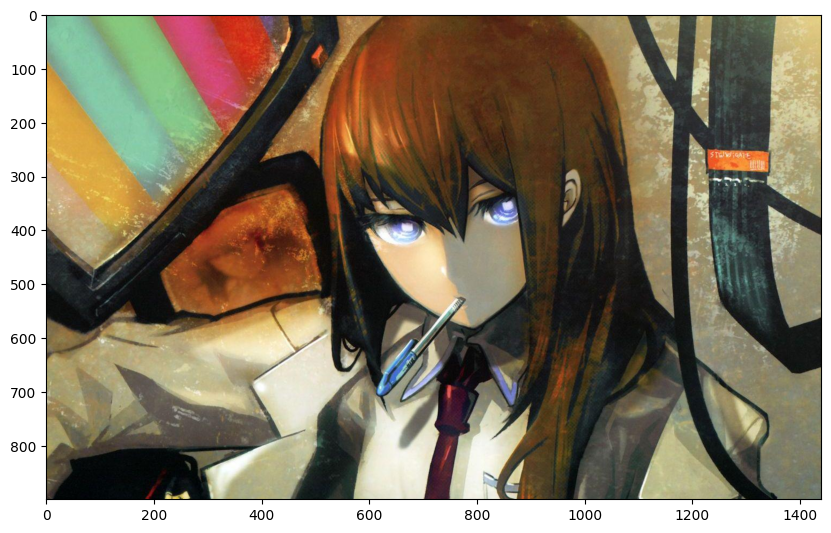

In [34]:
image = imread("UwU.jpg")

plt.figure(figsize=(10, 10))
plt.imshow(image)

print("Image is "+str(image.shape[0])+" by "+str(image.shape[1])+" pixels with "+str(image.shape[2])+" color channels")

In [35]:
def MessageToBits(message):
    #tag message (and pad w/ spaces till 10 characters)
    tag = "{:<10}".format(str(len(message)*8))
    message = tag+message
    #convert to bits
    code = bitarray.bitarray()
    code.frombytes(message.encode('utf-8'))
    code = "".join(['1' if x == True else '0' for x in code.tolist()])
    return code

In [37]:
print(MessageToBits(Scripts))

0011000100110001001100100011100000100000001000000010000000100000001000000010000001001011011001010110110001100001011100110010000000110110010000010010000001110011011001010110010001100001011011100110011100100000011011010110010101101100011000010110101101110101011010110110000101101110001000000101010101101010011010010110000101101110001000000101001101101001011100110111010001100101011011010010000001001011011001010110000101101101011000010110111001100001011011100010000001001010011000010111001001101001011011100110011101100001011011100010111000100000010100110110010101100100011000010110111001100111011010110110000101101110001000000100101101100101011011000110111101101101011100000110111101101011001000000011000000110101001000000011011001000001001000000111001101100001011011100110011101100001011001000010000001100010011010010110101001100001011010110010000001100100011001010110111001100111011000010110111000100000011100000110010101101101011010010110101101101001011100100110000101101110011011100111100101100001

In [38]:
def CheckBitSize(img, message):
    h = img.shape[0]
    w = img.shape[1]
    try:
        c = img.shape[2]
    except:
        c = 1
    image_max_size = h*w*c*2
    string_size = len(message)
    print("Message is "+str(string_size/8000)+" KB and image can fit "+str(image_max_size/8000)+" KB of data")
    if string_size > image_max_size:
        print("Message is too big to be encoded in image")
        return False
    else:
        print("Image can be encoded with message. Proceed")
        return True

CheckBitSize(image, MessageToBits(Scripts))

Message is 0.151 KB and image can fit 972.0 KB of data
Image can be encoded with message. Proceed


True

In [39]:
%%time
def EncodeImage(img, message):
    code = MessageToBits(message)
    if CheckBitSize(img, code):
        shape = img.shape
        img = img.flatten()
        code = list(code)
        code_len = len(code)
        for i,x in enumerate(img):
            if i*2 <code_len:
                zbits = list('{0:08b}'.format(x))[:6]+code[i*2:i*2+2]
                img[i] = int("".join(zbits), 2)
            else:
                return img.reshape(shape)
        return img.reshape(shape)

encoded_image = EncodeImage(image, Scripts)

Message is 0.151 KB and image can fit 972.0 KB of data
Image can be encoded with message. Proceed
CPU times: user 5.5 ms, sys: 0 ns, total: 5.5 ms
Wall time: 4.88 ms


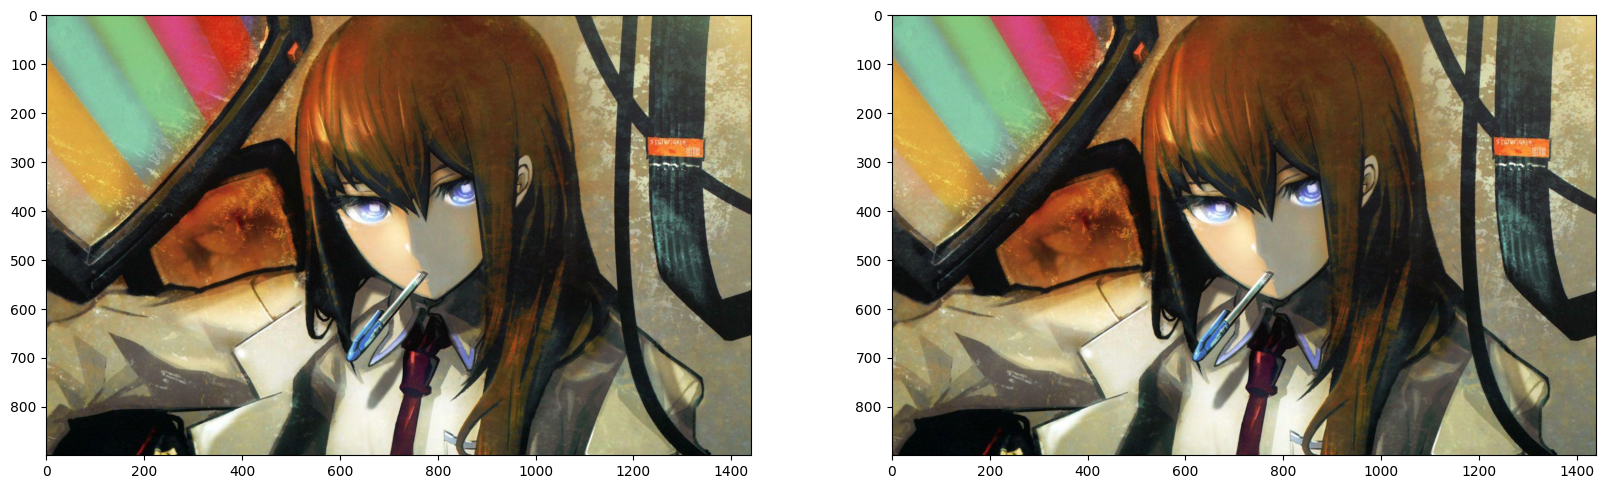

In [40]:
def CompareTwoImages(img1,img2):
    fig=plt.figure(figsize=(20, 20))
    fig.add_subplot(2, 2, 1)
    plt.imshow(img1)
    fig.add_subplot(2, 2, 2)
    plt.imshow(img2)
    plt.show()
CompareTwoImages(image, encoded_image)

In [44]:
print(image[200][200])
print(encoded_image[200][200])

[130 189 161]
[130 189 161]


In [45]:
%%time
def DecodeImage(img):
    bit_message = ""
    bit_count = 0
    bit_length = 200
    for i,x in enumerate(img):
        for j,y in enumerate(x):
            for k,z in enumerate(y):
                zbits = '{0:08b}'.format(z)
                bit_message += zbits[-2:]
                bit_count += 2
                if bit_count == 80:
                    try:
                        decoded_tag = bitarray.bitarray(bit_message).tobytes().decode('utf-8')
                        bit_length = int(decoded_tag)+80
                        bit_message = ""
                    except:
                        print("Image does not have decode tag. Image is either not encoded or, at least, not encoded in a way this decoder recognizes")
                        return
                elif bit_count >= bit_length:
                    return bitarray.bitarray(bit_message).tobytes().decode('utf-8')

decoded_message = DecodeImage(encoded_image)
print(decoded_message[:500])

Kelas 6A sedang melakukan Ujian Sistem Keamanan Jaringan. Sedangkan Kelompok 05 6A sangad bijak dengan pemikirannya dalam melakukan enkripsi 
CPU times: user 1.08 ms, sys: 4 µs, total: 1.09 ms
Wall time: 1.08 ms


In [46]:
print(decoded_message == Scripts)

True


In [48]:
skimage.io.imsave("ImageUwU_With_Scripts.jpg", encoded_image)